In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Загрузка датасета
dataset = pd.read_csv('S02-hw-dataset.csv')
df = pd.DataFrame(dataset)

Matplotlib is building the font cache; this may take a moment.


In [40]:
# Первичный осмотр датасета
print(df.head(), " - первые строки датасета\n",
      df.describe(), " - статистическое описание датасета\n")
df.info()
print(" - информация о датасете\n",)

   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296  - первые строки датасета
          user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11.659289   18.304259   2.710189   613.127269
min     1.000000    5.000000  -1.000000     0.000000
25%    10.000000   24.000000   3.000000   432.000000
50%    20.000000   33.000000   5.000000   693.000000
75%    30.000000   45.500000   7.000000  1115.000000
max    40.000000  120.000000  11.000000  2475.000000  - статистическое описание датасета

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   us

In [89]:
# Пропуски, дубликаты и базовый контроль качества
print("Доля пропущенных значений в каждом столбце:\n", df.isna().mean(), "\n")
print("Количество дубликатов в датасете:", df.duplicated().sum(), "\n")
# Подозрительные случаи
suspicious_cases = df[(df['age'] < 0) | (df['age']>=100) | (df['purchases'] < 0) 
                      | ((df['revenue']<=0) & (df['purchases']>0))
                      | (df['user_id'].duplicated()==True)
                      | (df.isna().any(axis=1))]
print("Подозрительные случаи:\n", suspicious_cases, "\n")
print("Обнаружено, что в датафрейме присутствуют пропуски значений в столбце 'age',\n" \
"логические несоответствия данных (по типу присутствия дубликата в столбце 'user_id',\n" \
"слишком огромный возраст или отсутствие возраста как такового, отрицательное количество покупок,\n" \
"наличие покупок при нулевом доходе)\n")

Доля пропущенных значений в каждом столбце:
 user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64 

Количество дубликатов в датасете: 1 

Подозрительные случаи:
     user_id    age country  purchases  revenue
4         5    NaN      DE          6     1296
5         6  120.0      FR         -1      785
10       11   24.0      US          4        0
12       13    NaN      US          9      630
40       10   24.0      RU          7      511 

Обнаружено, что в датафрейме присутствуют пропуски значений в столбце 'age',
логические несоответствия данных (по типу присутствия дубликата в столбце 'user_id',
слишком огромный возраст или отсутствие возраста как такового, отрицательное количество покупок,
наличие покупок при нулевом доходе)



Визуализация данных в Matplotlib

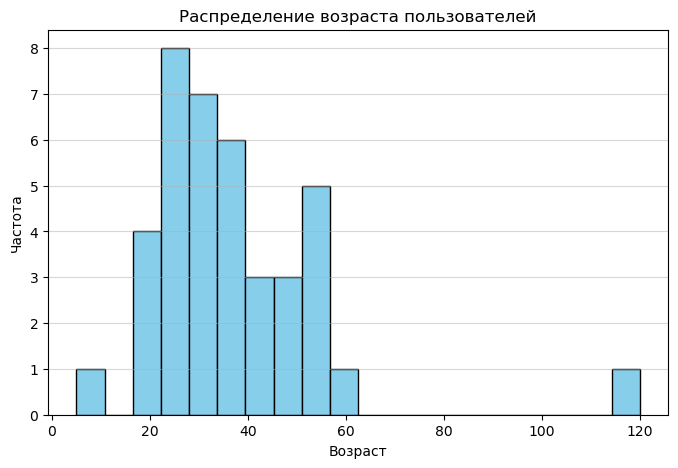

Гистограмма показывает распределение значений признака 'age' (возраста пользователей).
 Видно, что большинство клиентов сосредоточено в возрасте 20–40 лет.
 Небольшой правый столбец указывает на наличие пожилых клиентов.


<Figure size 640x480 with 0 Axes>

In [57]:
# Построим гистограмму распределения возраста пользователей
plt.figure(figsize=(8, 5))
plt.hist(df['age'].dropna(), bins=20, color='skyblue', edgecolor='black') # используем dropna() так как есть пропуски
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.5)
plt.show()
plt.savefig('figures/age_distribution.png')
print("Гистограмма показывает распределение значений признака 'age' (возраста пользователей).\n \
Видно, что большинство клиентов сосредоточено в возрасте 20–40 лет.\n \
Небольшой правый столбец указывает на наличие пожилых клиентов.")

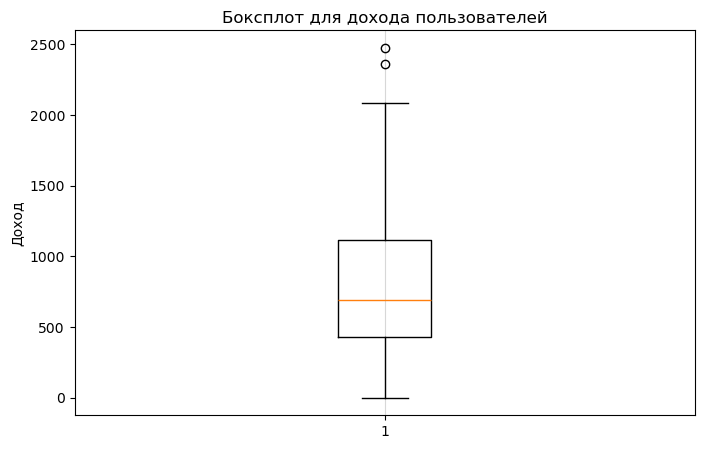

Боксплот для признака 'revenue' (доход пользователей) показывает медиану в районе 700,
квартильные значения и выбросы. Нижний квартиль находится на уровне 425, верхний квартиль в районе 1125,
но есть 2 выброса с гораздо более высоким доходом.


<Figure size 640x480 with 0 Axes>

In [90]:
# Один боксплот для колличесвенного признака
plt.figure(figsize=(8, 5))
plt.boxplot(df['revenue'])
plt.title('Боксплот для дохода пользователей')
plt.ylabel('Доход')
plt.grid(axis='x', alpha=0.5)
plt.show()
plt.savefig('figures/revenue_boxplot.png')
print("Боксплот для признака 'revenue' (доход пользователей) показывает медиану в районе 700,\n" \
"квартильные значения и выбросы. Нижний квартиль находится на уровне 425, верхний квартиль в районе 1125,\n" \
"но есть 2 выброса с гораздо более высоким доходом.")

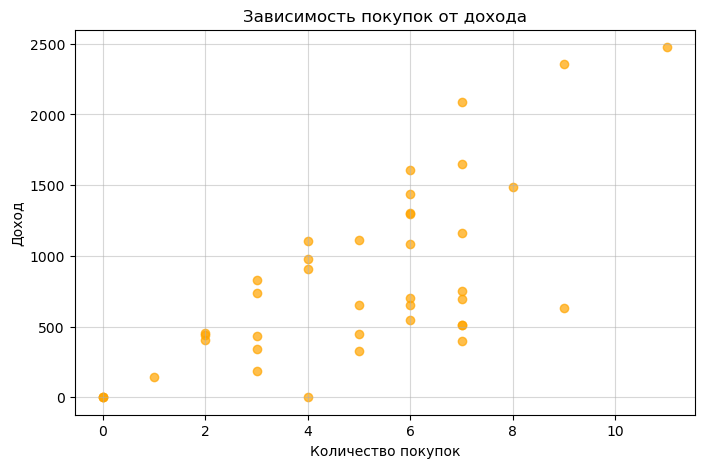

Диаграмма рассеяния показывает зависимость между количеством покупок и доходом.
Наблюдается тенденция увеличения количества покупок с увеличением дохода,
хотя есть исключения со средним доходом и минимальным колличеством покупок и наоборот.


<Figure size 640x480 with 0 Axes>

In [91]:
# Диаграмма рассеяния для двух количественных признаков
df_filtered = df[(df['purchases'] >= 0)]  # фильтрация отрицательных значений
plt.figure(figsize=(8, 5))
plt.scatter(df_filtered['purchases'], df_filtered['revenue'], alpha=0.7, color='orange')
plt.title('Зависимость покупок от дохода')
plt.xlabel('Количество покупок')
plt.ylabel('Доход')
plt.grid(alpha=0.5)
plt.show()
plt.savefig('figures/purchases_vs_revenue_scatter.png')
print("Диаграмма рассеяния показывает зависимость между количеством покупок и доходом.\n" \
"Наблюдается тенденция увеличения количества покупок с увеличением дохода,\n" \
"хотя есть исключения со средним доходом и минимальным колличеством покупок и наоборот.")